## 模型正则化

### 解决模型过拟合问题一个办法就是尽可能的减小系数，称为模型正则化


### 岭回归
#### 像下面这种模型正则化方式叫岭回归

<img src="../img/15.png" width="500" align="left"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

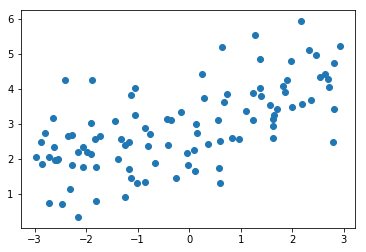

In [2]:
np.random.seed(42)
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x + 3 + np.random.normal(0,1,size=100)
plt.scatter(x,y)
plt.show()

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

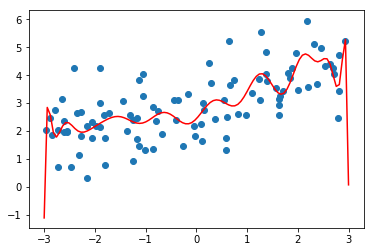

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ploy_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=20)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

ploy_reg.fit(X,y)
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_predict = ploy_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_predict,color='r')
plt.show()

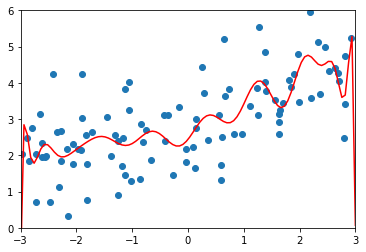

In [4]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(ploy_reg)

### 使用岭回归

In [5]:
from sklearn.linear_model import Ridge

def Ridgeregression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",Ridge(alpha=alpha))
    ])

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

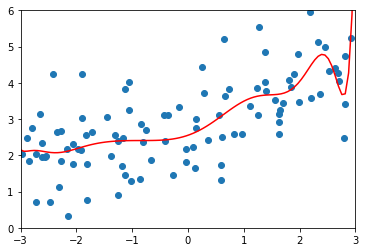

In [7]:
ridge_reg = Ridgeregression(20,0.0001)
ridge_reg.fit(X,y)
plot_model(ridge_reg)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

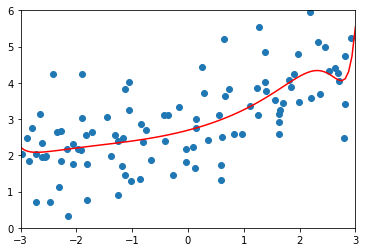

In [8]:
ridge_reg2 = Ridgeregression(20,1)
ridge_reg2.fit(X,y)
plot_model(ridge_reg2)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

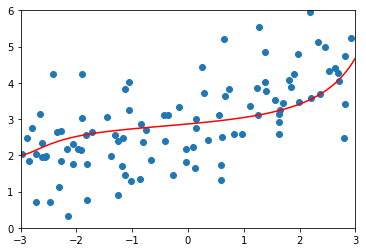

In [9]:
ridge_reg3 = Ridgeregression(20,100)
ridge_reg3.fit(X,y)
plot_model(ridge_reg3)

### LASSO 回归

<img src="../img/16.png" width="500" align="left"/>

In [10]:
from sklearn.linear_model import Lasso

def Lassoregression(degree,alpha):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ("lin_reg",Lasso(alpha=alpha))
    ])

/Users/zc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

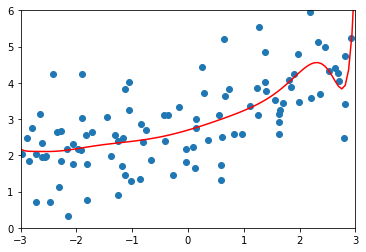

In [11]:
lasso_reg = Lassoregression(20,0.0001)
lasso_reg.fit(X,y)
plot_model(lasso_reg)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

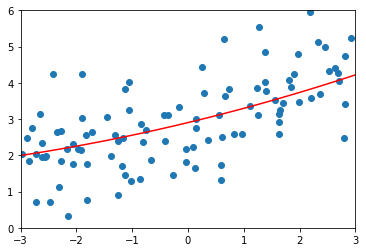

In [13]:
lasso_reg = Lassoregression(20,0.1)
lasso_reg.fit(X,y)
plot_model(lasso_reg)